### Bag of Word  Machine Learning Performance

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Plot Confusion Matrix Function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Load Data

URL : https://www.kaggle.com/c/fake-news/data

In [3]:
#Read Data
df=pd.read_csv('train.csv')
df.shape

(20800, 5)

In [4]:
# Drop Nan Value
df=df.dropna()
df.shape

(18285, 5)

In [5]:
## Get the Independent Features
X=df.drop('label',axis=1)
## Get the Dependent features
y=df['label']

In [6]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.shape

(18285, 6)

### Data Preprocessing

In [7]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
## Bag of Words feature extraction
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
## Independent Features
X = cv.fit_transform(corpus).toarray()
## Dependent Features
y=messages['label']

### Data Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Machine Learning Algorithms

## Naive Bayes  : BernoulliNB

accuracy:   0.907575
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2040
           1       0.85      0.96      0.90      1617

    accuracy                           0.91      3657
   macro avg       0.91      0.91      0.91      3657
weighted avg       0.91      0.91      0.91      3657



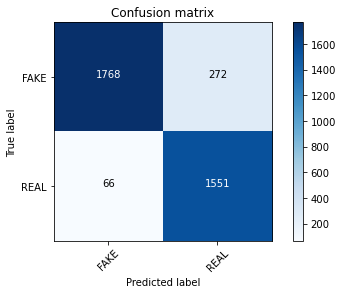

In [10]:
from sklearn.naive_bayes import BernoulliNB
bern=BernoulliNB(alpha = 0.01)
bern.fit(X_train, y_train)
pred_bern = bern.predict(X_test)
score_bern = metrics.accuracy_score(y_test, pred_bern)
print("accuracy:   %f" % score_bern)
cm_bern = metrics.confusion_matrix(y_test, pred_bern)
plot_confusion_matrix(cm_bern ,classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_bern))

### Logistic Regression

accuracy:   0.936013
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2040
           1       0.90      0.96      0.93      1617

    accuracy                           0.94      3657
   macro avg       0.93      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



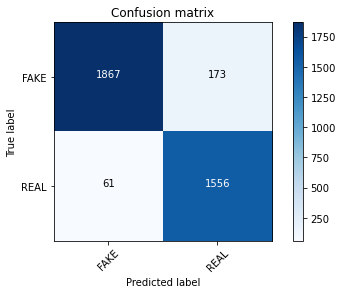

In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=2, solver='newton-cg')
LR.fit(X_train,y_train)
pred_lr=LR.predict(X_test)
score_lr = metrics.accuracy_score(y_test, pred_lr)
print("accuracy:   %f" % score_lr)
cm_lr = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_lr))

### Decision Tree

accuracy:   0.923435
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2040
           1       0.90      0.93      0.91      1617

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657



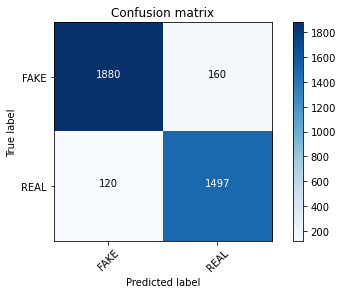

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = None, 
                            min_samples_split = 2, min_samples_leaf = 1)
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
score_dt = metrics.accuracy_score(y_test, pred_dt)
print("accuracy:   %f" % score_dt)
cm_dt = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_dt))

### Random Forest

accuracy:   0.933005
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2040
           1       0.89      0.97      0.93      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.94      0.93      3657
weighted avg       0.94      0.93      0.93      3657



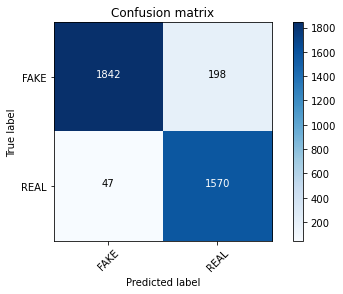

In [13]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2,
                             min_samples_leaf = 1, max_leaf_nodes = None)
RFC.fit(X_train, y_train)
pred_rfc=RFC.predict(X_test)
score_rfc = metrics.accuracy_score(y_test, pred_rfc)
print("accuracy:   %f" % score_rfc)
cm_rfc = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_rfc))

### Support Vector Machine

accuracy:   0.929997
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2040
           1       0.90      0.95      0.92      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



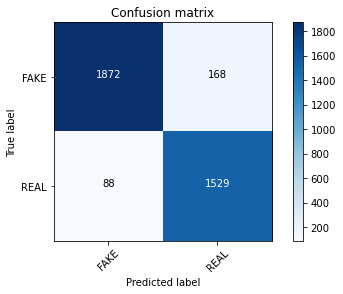

In [14]:
from sklearn import  svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)
pred_svm=SVM.predict(X_test)
score_svm = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %f" % score_svm)
cm_svm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm_svm, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_svm))

### ANN: MLPClassifier

accuracy:   0.928903
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2040
           1       0.91      0.94      0.92      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



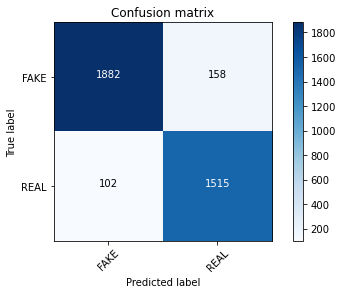

In [16]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='logistic', solver='lbfgs', early_stopping= False,
                                   alpha= 1 ,hidden_layer_sizes=(100))
MLPClassifierModel.fit(X_train, y_train)
pred_mlp=MLPClassifierModel.predict(X_test)
score_mlp= metrics.accuracy_score(y_test, pred_mlp)
print("accuracy:   %f" % score_mlp)
cm_mlp = metrics.confusion_matrix(y_test, pred_mlp)
plot_confusion_matrix(cm_mlp, classes=['FAKE', 'REAL'])
print(classification_report(y_test, pred_mlp))